# Capstone Project - Sentiment Analysis

- Tejas Vyas
- Gbemisola Banjoko
- Riddhi Thakkar
- Manu Sihag

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
import pandas as pd
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

## Dataset
To generate our classifier, we're using data from Sentiment Labelled Sentences Data Set - *From Group to Individual Labels using Deep Features, Kotzias et. al,. KDD 2015*
https://www.kaggle.com/marklvl/sentiment-labelled-sentences-data-set

The dataset contains data from:
- imdb.com
- amazon.com
- yelp.com

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews.
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

Individual website data is available in txt files -
- amazon_cells_labelled.txt
    - This file contains data from amazon.com
    - Product reviews
    - Includes 2 columns
        - a column which is the main data we can extrapolate features from
        - a label column (1 = Positive, 0 = Negative)
- yelp_labelled.txt
    - This file contains data from yelp.com
    - Food reviews
    - Includes 2 columns
        - a column which is the main data we can extrapolate features from
        - a label column  (1 = Positive, 0 = Negative)
- imdb_labelled.txt
    - This file contains data from imdb.com
    - Movie reviews
    - Includes 2 columns
        - a column which is the main data we can extrapolate features from
        - a label column  (1 = Positive, 0 = Negative)

## Importing data

In [5]:
#Amazon Data
input_file = "amazon_cells_labelled.txt"
amazon = pd.read_csv(input_file,delimiter='\t',header=None, names=['review', 'sentiment'])
amazon['source']='amazon'

#Yelp Data
input_file = "yelp_labelled.txt"
yelp = pd.read_csv(input_file,delimiter='\t',header=None, names=['review', 'sentiment'])
yelp['source']='yelp'

#Imdb Data
input_file = "imdb_labelled.txt"
imdb = pd.read_csv(input_file,delimiter='\t',header=None, names=['review', 'sentiment'])
imdb['source']='imdb'

#combine all data sets
data = pd.DataFrame()
data = pd.concat([amazon, yelp, imdb])
data['sentiment'] = data['sentiment'].astype(str)
print(data.head(5))
print(data.tail(5))

                                              review sentiment  source
0  So there is no way for me to plug it in here i...         0  amazon
1                        Good case, Excellent value.         1  amazon
2                             Great for the jawbone.         1  amazon
3  Tied to charger for conversations lasting more...         0  amazon
4                                  The mic is great.         1  amazon
                                                review sentiment source
743  I just got bored watching Jessice Lange take h...         0   imdb
744  Unfortunately, any virtue in this film's produ...         0   imdb
745                   In a word, it is embarrassing.           0   imdb
746                               Exceptionally bad!           0   imdb
747  All in all its an insult to one's intelligence...         0   imdb


In [3]:
print('Review NaN row counts:', data['review'].isnull().sum())
print('Seniment NaN row counts:', data['sentiment'].isnull().sum())

Review NaN row counts: 0
Seniment NaN row counts: 0


## Reviewing Data Distribution

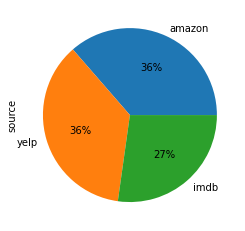

In [81]:
data['source'].value_counts().plot(kind='pie', autopct='%1.0f%%')

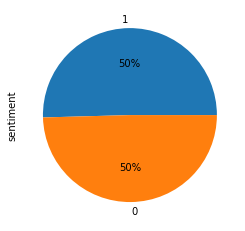

In [82]:
data.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [6]:
import nltk
nltk.download('stopwords')

data['word_count'] = data['review'].apply(lambda x : len(x.split()))
data['char_count'] = data['review'].apply(lambda x : len(x.replace(" ","")))
data['stopwords'] = data['review'].apply(lambda x: len([x for x in x.split() if x in stopwords.words('english')]))
data['num_count'] = data['review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data['upper_count'] = data['review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

print(data[['word_count', 'char_count', 'stopwords', 'num_count', 'upper_count']].head(5))

data.sum(axis = 0, numeric_only = True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   word_count  char_count  stopwords  num_count  upper_count
0          21          62         13          0            2
1           4          24          0          0            0
2           4          19          2          0            0
3          11          69          4          1            1
4           4          14          1          0            0


word_count      35742
char_count     162066
stopwords       13865
num_count         404
upper_count      1260
dtype: int64

## Word Clouds

<ipython-input-9-7d2109d7f1fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df1['sentiment'] = all_df1['sentiment'].astype(int)


(-0.5, 799.5, 1599.5, -0.5)

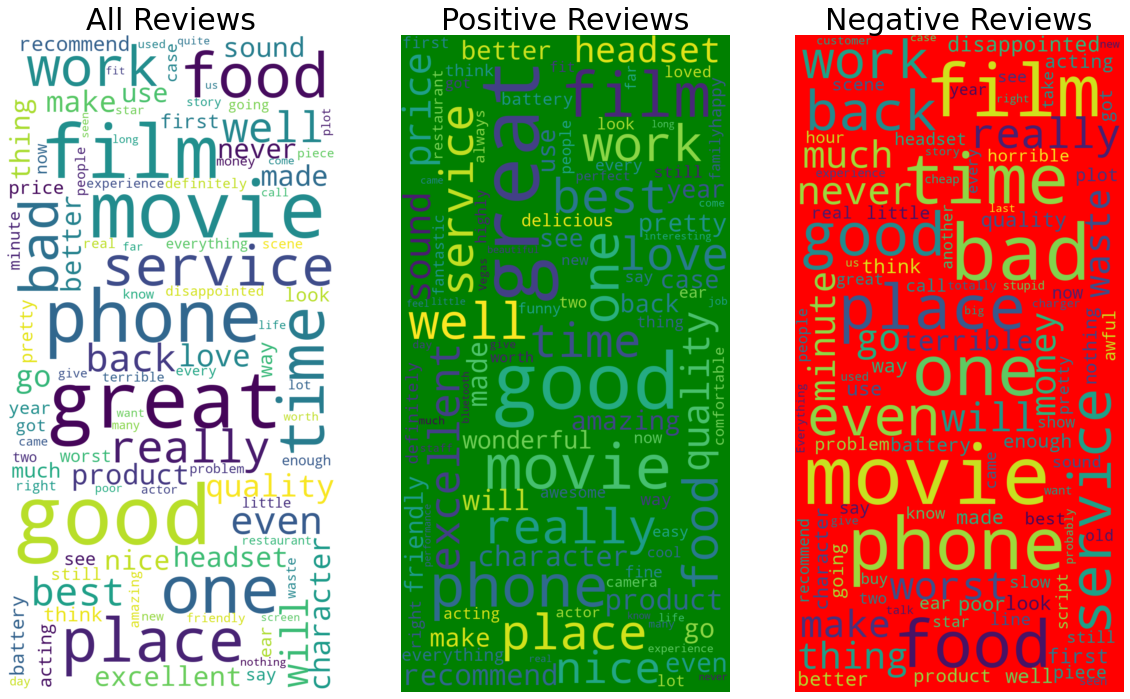

In [9]:
all_df1 = data[['review', 'sentiment']]
all_df1['sentiment'] = all_df1['sentiment'].astype(int)
df_1 = all_df1[all_df1['sentiment']==1]
df_0 = all_df1[all_df1['sentiment']==0]
rev_All = " ".join(review for review in all_df1.review)
rev_1 = " ".join(review for review in df_1.review)
rev_0 = " ".join(review for review in df_0.review)

fig, ax = plt.subplots(1, 3, figsize  = (20,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(width=800, height=1600, max_font_size=200,collocations=False, max_words=100, background_color="white").generate(rev_All)
wordcloud_1 = WordCloud(width=800, height=1600, max_font_size=200,collocations=False, max_words=100, background_color="green").generate(rev_1)
wordcloud_0 = WordCloud(width=800, height=1600, max_font_size=200,collocations=False, max_words=100, background_color="red").generate(rev_0)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Reviews', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_1, interpolation='bilinear')
ax[1].set_title('Positive Reviews',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_0, interpolation='bilinear')
ax[2].set_title('Negative Reviews',fontsize=30)
ax[2].axis('off')



In [7]:
data = data.drop(columns=['word_count','char_count','num_count','upper_count','stopwords'])

## Data Cleanup and tokenization

In [8]:
import string
def remove_punct(text):
  text_nopunct= "".join ([char for char in text if char not in string.punctuation])
  return text_nopunct
data['body_text_clean']=data['review'].apply(lambda x:remove_punct(x))
data.head()

,review,sentiment,source,body_text_clean
0,So there is no way for me to plug it in here i...,0,amazon,So there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,amazon,Good case Excellent value
2,Great for the jawbone.,1,amazon,Great for the jawbone
3,Tied to charger for conversations lasting more...,0,amazon,Tied to charger for conversations lasting more...
4,The mic is great.,1,amazon,The mic is great


In [9]:
import re
def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens
data['body_text_tokenized']=data['body_text_clean'].apply(lambda x: tokenize(x.lower()))
data.head()

,review,sentiment,source,body_text_clean,body_text_tokenized
0,So there is no way for me to plug it in here i...,0,amazon,So there is no way for me to plug it in here i...,"[so, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,Good case Excellent value,"[good, case, excellent, value]"
2,Great for the jawbone.,1,amazon,Great for the jawbone,"[great, for, the, jawbone]"
3,Tied to charger for conversations lasting more...,0,amazon,Tied to charger for conversations lasting more...,"[tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,The mic is great,"[the, mic, is, great]"


In [10]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
  text = [word for word in tokenized_list if word not in stopword]
  return text

data['body_text_nostop']=data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
data.head()

,review,sentiment,source,body_text_clean,body_text_tokenized,body_text_nostop
0,So there is no way for me to plug it in here i...,0,amazon,So there is no way for me to plug it in here i...,"[so, there, is, no, way, for, me, to, plug, it...","[way, plug, us, unless, go, converter]"
1,"Good case, Excellent value.",1,amazon,Good case Excellent value,"[good, case, excellent, value]","[good, case, excellent, value]"
2,Great for the jawbone.,1,amazon,Great for the jawbone,"[great, for, the, jawbone]","[great, jawbone]"
3,Tied to charger for conversations lasting more...,0,amazon,Tied to charger for conversations lasting more...,"[tied, to, charger, for, conversations, lastin...","[tied, charger, conversations, lasting, 45, mi..."
4,The mic is great.,1,amazon,The mic is great,"[the, mic, is, great]","[mic, great]"


## N-Gram Analysis

In [11]:
nltk.download('wordnet')

def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Creating cleaned words for all 3 categories

In [46]:
pos_words = basic_clean(''.join(str(data.where(data['sentiment']=="1").dropna()['body_text_nostop'].tolist())))
neg_words = basic_clean(''.join(str(data.where(data['sentiment']=="0").dropna()['body_text_nostop'].tolist())))
all_words = basic_clean(''.join(str(data.dropna()['body_text_nostop'].tolist()))) 

### Unigrams

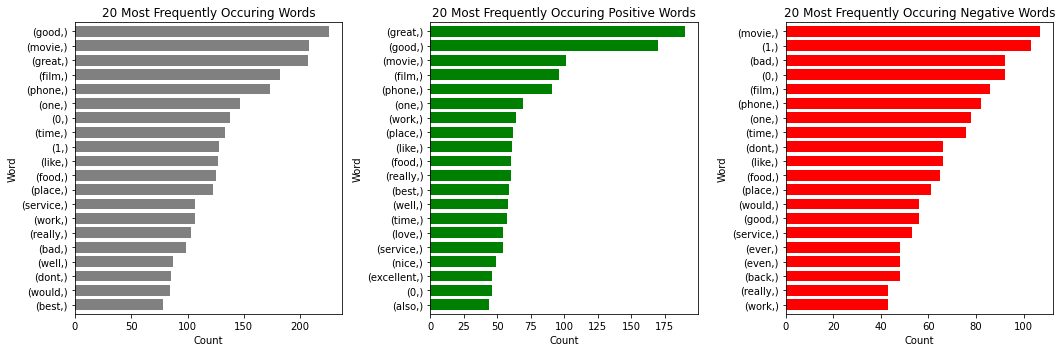

In [50]:
unigrams_series = (pd.Series(nltk.ngrams(all_words,1)).value_counts())[:20]
pos_unigrams_series = (pd.Series(nltk.ngrams(pos_words,1)).value_counts())[:20]
neg_unigrams_series = (pd.Series(nltk.ngrams(neg_words,1)).value_counts())[:20]

fig, axes = plt.subplots(1,3,figsize=(15,5))
unigrams_series.sort_values().plot.barh(color='gray', ax=axes[0], width=0.75, title='20 Most Frequently Occuring Words')
pos_unigrams_series.sort_values().plot.barh(color='green', ax=axes[1], width=0.75, title='20 Most Frequently Occuring Positive Words')
neg_unigrams_series.sort_values().plot.barh(color='red', ax=axes[2], width=0.75, title='20 Most Frequently Occuring Negative Words')
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Word")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Word")
axes[2].set_xlabel("Count")
axes[2].set_ylabel("Word")
plt.tight_layout()


### Bigrams

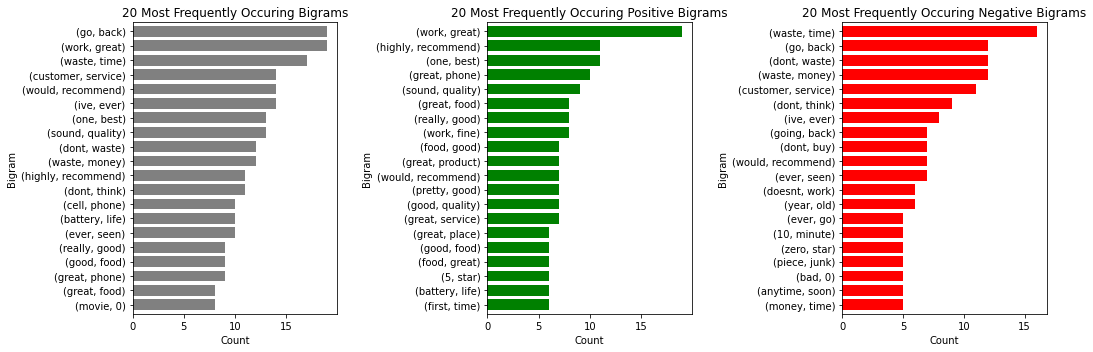

In [52]:
bigrams_series = (pd.Series(nltk.ngrams(all_words,2)).value_counts())[:20]
pos_bigrams_series = (pd.Series(nltk.ngrams(pos_words,2)).value_counts())[:20]
neg_bigrams_series = (pd.Series(nltk.ngrams(neg_words,2)).value_counts())[:20]

fig, axes = plt.subplots(1,3,figsize=(15,5))
bigrams_series.sort_values().plot.barh(color='gray', ax=axes[0], width=0.75, title='20 Most Frequently Occuring Bigrams')
pos_bigrams_series.sort_values().plot.barh(color='green', ax=axes[1], width=0.75, title='20 Most Frequently Occuring Positive Bigrams')
neg_bigrams_series.sort_values().plot.barh(color='red', ax=axes[2], width=0.75, title='20 Most Frequently Occuring Negative Bigrams')
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Bigram")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Bigram")
axes[2].set_xlabel("Count")
axes[2].set_ylabel("Bigram")
plt.tight_layout()


### Trigrams

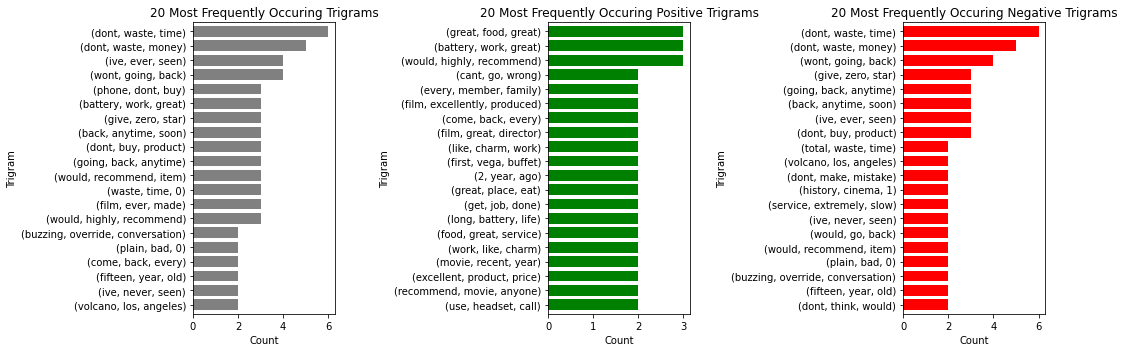

In [54]:
trigrams_series = (pd.Series(nltk.ngrams(all_words,3)).value_counts())[:20]
pos_trigram_series = (pd.Series(nltk.ngrams(pos_words,3)).value_counts())[:20]
neg_trigram_series = (pd.Series(nltk.ngrams(neg_words,3)).value_counts())[:20]

fig, axes = plt.subplots(1,3,figsize=(15,5))
trigrams_series.sort_values().plot.barh(color='gray', ax=axes[0], width=0.75, title='20 Most Frequently Occuring Trigrams')
pos_trigram_series.sort_values().plot.barh(color='green', ax=axes[1], width=0.75, title='20 Most Frequently Occuring Positive Trigrams')
neg_trigram_series.sort_values().plot.barh(color='red', ax=axes[2], width=0.75, title='20 Most Frequently Occuring Negative Trigrams')
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Trigram")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Trigram")
axes[2].set_xlabel("Count")
axes[2].set_ylabel("Trigram")
plt.tight_layout()

## Topic Modeling with LDA

### Setup

In [64]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx, " ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]).strip())
        
# Tweak the two parameters below
number_topics = 5
number_words = 10

### All Topics

In [63]:
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(x_count)
# Print the topics found by the LDA model
print("Topics found via LDA:\n")
print_topics(lda, count_vect, number_words)

Topics found via LDA:

Topic #0: would  disappointed recommend phone even place well item ive
Topic #1: 0 1 film movie one like time good great
Topic #2: phone great headset one ever worst service good sound
Topic #3: good food great really place service movie also like
Topic #4: movie go bad back good like film one worth


### Negative Topics

In [62]:
count_vect_neg=CountVectorizer(analyzer=remove_stopwords)
x_count_neg=count_vect_neg.fit_transform(data.where(data['sentiment']=="0")\
                                         .dropna()['body_text_nostop'])
# Create and fit the LDA model
lda_neg = LDA(n_components=number_topics, n_jobs=-1)
lda_neg.fit(x_count_neg)
# Print the topics found by the LDA model
print("Negative topics found via LDA:")
print_topics(lda_neg, count_vect_neg, number_words)

Negative topics found via LDA:
Topic #0: phone  bad quality minutes food never disappointing poor waited
Topic #1: 1 0  one movie film dont didnt work even
Topic #2: back time dont waste money would place go really
Topic #3: service  place food ever good worst terrible slow ive
Topic #4: bad like im movie film phone awful food would


### Positive topics

In [65]:
count_vect_pos=CountVectorizer(analyzer=remove_stopwords)
x_count_pos=count_vect_pos.fit_transform(data.where(data['sentiment']=="1")\
                                         .dropna()['body_text_nostop'])
# Create and fit the LDA model
lda_pos = LDA(n_components=number_topics, n_jobs=-1)
lda_pos.fit(x_count_pos)
# Print the topics found by the LDA model
print("Positive topics found via LDA:")
print_topics(lda_pos, count_vect_pos, number_words)

Positive topics found via LDA:
Topic #0: service food  nice place friendly delicious like staff pretty
Topic #1: good really  food phone movie excellent quality product definitely
Topic #2: headset best good works sound excellent great well comfortable
Topic #3: movie film 0 good well one also 1 great
Topic #4: great phone  place recommend one love works price product


## All words topic visualization

In [66]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
    
LDAvis_prepared = sklearn_lda.prepare(lda, x_count, count_vect)
pyLDAvis.display(LDAvis_prepared)

### Positive topics Visualization

In [67]:
LDAvis_prepared_pos = sklearn_lda.prepare(lda_pos, x_count_pos, count_vect_pos)
pyLDAvis.display(LDAvis_prepared_pos)

### Negative Topics Visualization

In [68]:
LDAvis_prepared_neg = sklearn_lda.prepare(lda_neg, x_count_neg, count_vect_neg)
pyLDAvis.display(LDAvis_prepared_neg)

# Setup train and test splits

### Creating cleaned sentence list to use in vectorizers

In [12]:
clean_sentences = []
for l in data['body_text_nostop'].values:
    clean_sentences.append(' '.join(l))
#print(clean_sentences)
y = data['sentiment']

### Vectorization

In [13]:
from sklearn import linear_model, model_selection

sentences_train, sentences_test, y_train, y_test = model_selection.train_test_split(clean_sentences, y, test_size=0.25, random_state=42)
#print(sentences_train)
vectorizer = CountVectorizer(ngram_range=(1, 3))
vectorizer.fit(sentences_train)
X = vectorizer.transform(clean_sentences)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transform=TfidfTransformer()
X_tfidf = tfidf_transform.fit_transform(X)
X_train_tfidf=tfidf_transform.fit_transform(X_train)
X_test_tfidf=tfidf_transform.fit_transform(X_test)

# Algorithm approaches

- Logistic Regression
- Naive Bayes
- Support Vector Machines
- Decision Tree
- Random Forest
- Deep Learning - LSTM

### Training

In [91]:
#Logistic Regression
logRes = linear_model.LogisticRegression()
logRes.fit(X_train, y_train)
logResscore = logRes.score(X_test, y_test)

In [92]:
logRes_tfidf = linear_model.LogisticRegression()
logRes_tfidf.fit(X_train_tfidf, y_train)
logRes_tfidf_score = logRes_tfidf.score(X_test_tfidf, y_test)

In [93]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train.toarray(), y_train)
nbscore = nb.score(X_test.toarray(), y_test)

In [94]:
nb_tfidf = GaussianNB()
nb_tfidf.fit(X_train_tfidf.toarray(), y_train)
nb_tfidf_score = nb_tfidf.score(X_test_tfidf.toarray(), y_test)

In [95]:
#Support Vector Machines
from sklearn import svm

svc_classifier = svm.SVC()
svc_classifier.fit(X_train.toarray(), y_train)
svc_classifierscore = svc_classifier.score(X_test.toarray(), y_test)

In [15]:
from sklearn import svm
svc_classifier_tfidf = svm.SVC(random_state=0)
svc_classifier_tfidf.fit(X_train_tfidf.toarray(), y_train)
svc_classifier_tfidf_score = svc_classifier_tfidf.score(X_test_tfidf.toarray(), y_test)

In [97]:
#Decision Trees
from sklearn import tree

dec_tree_tfidf = tree.DecisionTreeClassifier()
dec_tree_tfidf.fit(X_train_tfidf.toarray(), y_train)
dec_tree_tfidf_score = dec_tree_tfidf.score(X_test_tfidf.toarray(), y_test)

In [98]:
dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(X_train.toarray(), y_train)
dec_treescore = dec_tree.score(X_test.toarray(), y_test)

In [99]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf.toarray(), y_train)
rf_tfidf_score = rf_tfidf.score(X_test_tfidf.toarray(), y_test)

In [100]:
rf = RandomForestClassifier()
rf.fit(X_train.toarray(), y_train)
rfscore = rf.score(X_test.toarray(), y_test)

In [ ]:
!pip install tensorflow_datasets

In [103]:
#LSTM
#!pip install tensorflow_datasets
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
import tensorflow_datasets as tfds
import numpy as np
max_length =100
trunc_type='post'
padding_type='post'
#pad all Sequence
vocab_size=1000

temp_sentences=data['review'].tolist()
label=data['sentiment'].astype(int).tolist()

tokenizer_tfds=tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(temp_sentences,vocab_size,max_subword_length=5)
for i,sent in enumerate(temp_sentences):
    temp_sentences[i]=tokenizer_tfds.encode(sent)
sequence_added=pad_sequences(temp_sentences,maxlen=max_length,padding =padding_type,truncating=trunc_type)

training_size=int(len(temp_sentences)*0.75)
train_seq=sequence_added[:training_size]
train_labels=label[:training_size]

test_seq=sequence_added[training_size:]
test_labels=label[training_size:]

train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

def createLSTM():
    embedding_dim=16
    model=Sequential([
        Embedding(1000,embedding_dim,input_length=100),
        Bidirectional(LSTM(embedding_dim,return_sequences=True)),
        Bidirectional(LSTM(embedding_dim)),        
        Dense(6,activation='relu'),
        Dense(1,activation='sigmoid')
    ])
    return model

In [104]:
lstm_classifier = createLSTM()
lstm_classifier.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
lstm_classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 32)           4224      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 26,701
Trainable params: 26,701
Non-trainable params: 0
_________________________________________________________________


In [106]:
lstm_classifier.fit(train_seq,train_labels,epochs=12,validation_data=(test_seq,test_labels))
lstm_score = lstm_classifier.evaluate(test_seq,test_labels)[1]

Epoch 1/12
65/65 [==============================] - 3s 50ms/step - loss: 0.0517 - accuracy: 0.9908 - val_loss: 1.5372 - val_accuracy: 0.6594
Epoch 2/12
65/65 [==============================] - 3s 50ms/step - loss: 0.0520 - accuracy: 0.9908 - val_loss: 1.5477 - val_accuracy: 0.6652
Epoch 3/12
65/65 [==============================] - 3s 49ms/step - loss: 0.0503 - accuracy: 0.9908 - val_loss: 1.5781 - val_accuracy: 0.6565
Epoch 4/12
65/65 [==============================] - 3s 49ms/step - loss: 0.0496 - accuracy: 0.9913 - val_loss: 1.5701 - val_accuracy: 0.6667
Epoch 5/12
65/65 [==============================] - 3s 48ms/step - loss: 0.0481 - accuracy: 0.9913 - val_loss: 1.5973 - val_accuracy: 0.6667
Epoch 6/12
65/65 [==============================] - 3s 48ms/step - loss: 0.0476 - accuracy: 0.9913 - val_loss: 1.6316 - val_accuracy: 0.6652
Epoch 7/12
65/65 [==============================] - 3s 48ms/step - loss: 0.0460 - accuracy: 0.9913 - val_loss: 1.6197 - val_accuracy: 0.6638
Epoch 8/12
65

# Accuracies

In [260]:
print("Logistic Regression Accuracy")
print("Count Vectorizer", format(logResscore,'.2%'))
print("TFIDF Vectorizer:", format(logRes_tfidf_score,'.2%'))
print("-----------")
print("Naive Bayes Accuracy")
print("Count Vectorizer", format(nbscore,'.2%'))
print("TFIDF Vectorizer:", format(nb_tfidf_score,'.2%'))
print("-----------")
print("Support Vector Machine Accuracy")
print("Count Vectorizer", format(svc_classifierscore,'.2%'))
print("TFIDF Vectorizer:", format(svc_classifier_tfidf_score,'.2%'))
print("-----------")
print("Decision Tree Accuracy")
print("Count Vectorizer", format(dec_treescore,'.2%'))
print("TFIDF Vectorizer:", format(dec_tree_tfidf_score,'.2%'))
print("-----------")
print("Random Forest Accuracy")
print("Count Vectorizer", format(rfscore,'.2%'))
print("TFIDF Vectorizer:", format(rf_tfidf_score,'.2%'))
print("-----------")
print("Deep Learning LSTM Accuracy")
print("Subword Text Encoder Accuracy",format(lstm_score,'.2%'))
print("-----------")

Logistic Regression Accuracy
Count Vectorizer 82.53%
TFIDF Vectorizer: 82.24%
-----------
Naive Bayes Accuracy
Count Vectorizer 71.91%
TFIDF Vectorizer: 73.36%
-----------
Support Vector Machine Accuracy
Count Vectorizer 80.93%
TFIDF Vectorizer: 83.41%
-----------
Decision Tree Accuracy
Count Vectorizer 77.87%
TFIDF Vectorizer: 75.98%
-----------
Random Forest Accuracy
Count Vectorizer 78.89%
TFIDF Vectorizer: 79.33%
-----------
Deep Learning LSTM Accuracy
Subword Text Encoder Accuracy 66.08%
-----------


# AI Algorithm Analysis and Hyperparam Optimization

## Confusion Matrices

Confusion Matrices -


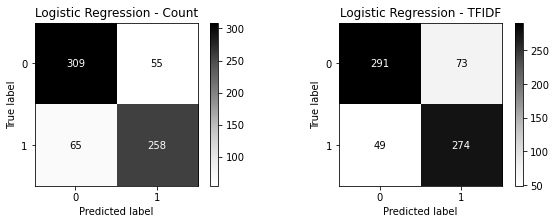

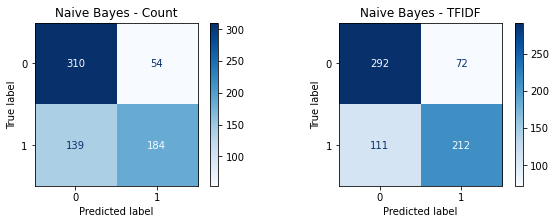

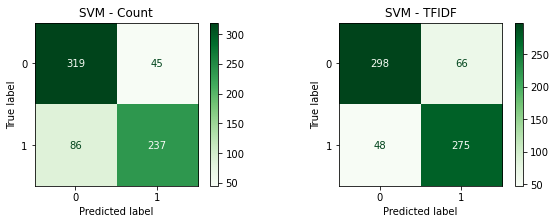

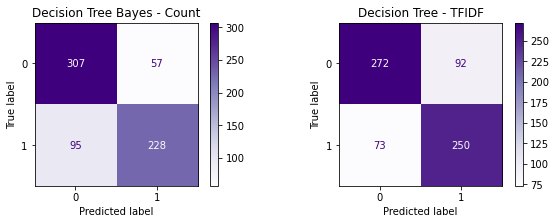

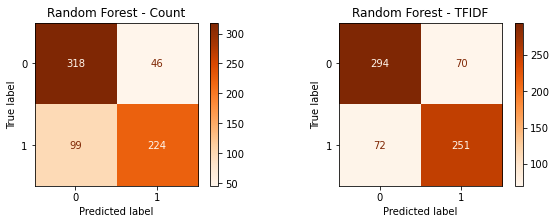

In [111]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plot_confusion_matrix(logRes, X_test, y_test, cmap=plt.cm.Greys, ax=ax1)
plot_confusion_matrix(logRes_tfidf, X_test_tfidf, y_test, cmap=plt.cm.Greys, ax=ax2)
ax1.set_title("Logistic Regression - Count")
ax2.set_title("Logistic Regression - TFIDF")

fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plot_confusion_matrix(nb, X_test.toarray(), y_test, cmap=plt.cm.Blues, ax=ax1)
plot_confusion_matrix(nb_tfidf, X_test_tfidf.toarray(), y_test, cmap=plt.cm.Blues, ax=ax2)
ax1.set_title("Naive Bayes - Count")
ax2.set_title("Naive Bayes - TFIDF")

fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plot_confusion_matrix(svc_classifier, X_test.toarray(), y_test, cmap=plt.cm.Greens, ax=ax1)
plot_confusion_matrix(svc_classifier_tfidf, X_test_tfidf.toarray(), y_test, cmap=plt.cm.Greens, ax=ax2)
ax1.set_title("SVM - Count")
ax2.set_title("SVM - TFIDF")

fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plot_confusion_matrix(dec_tree, X_test.toarray(), y_test, cmap=plt.cm.Purples, ax=ax1)
plot_confusion_matrix(dec_tree_tfidf, X_test_tfidf.toarray(), y_test, cmap=plt.cm.Purples, ax=ax2)
ax1.set_title("Decision Tree Bayes - Count")
ax2.set_title("Decision Tree - TFIDF")

fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Oranges, ax=ax1)
plot_confusion_matrix(rf_tfidf, X_test_tfidf, y_test, cmap=plt.cm.Oranges, ax=ax2)
ax1.set_title("Random Forest - Count")
ax2.set_title("Random Forest - TFIDF")

print("Confusion Matrices -")

### Other scores via Classification Report

In [113]:
from sklearn.metrics import classification_report

lr_pred = logRes.predict(X_test)
lr_pred_tfidf = logRes_tfidf.predict(X_test_tfidf)

nb_pred = nb.predict(X_test.toarray())
nb_pred_tfidf = nb_tfidf.predict(X_test_tfidf.toarray())

svc_pred = svc_classifier.predict(X_test.toarray())
svc_pred_tfidf = svc_classifier_tfidf.predict(X_test_tfidf.toarray())

dec_tree_pred = dec_tree.predict(X_test.toarray())
dec_tree_pred_tfidf = dec_tree_tfidf.predict(X_test_tfidf.toarray())

rf_pred = rf.predict(X_test.toarray())
rf_pred_tfidf = rf_tfidf.predict(X_test_tfidf.toarray())


In [115]:
svc_pred_tfidf = svc_classifier_tfidf.predict(X_test_tfidf.toarray())

In [116]:
print("Logistic Regression")
print("Count Vectorizer")
print(classification_report(y_test, lr_pred))
print("--")
print("TFIDF Vectorizer")
print(classification_report(y_test, lr_pred_tfidf))
print("---------------------")
print("Naive Bayes")
print("Count Vectorizer")
print(classification_report(y_test, nb_pred))
print("--")
print("TFIDF Vectorizer")
print(classification_report(y_test, nb_pred_tfidf))
print("---------------------")
print("SVM")
print("Count Vectorizer")
print(classification_report(y_test, svc_pred))
print("--")
print("TFIDF Vectorizer")
print(classification_report(y_test, svc_pred_tfidf))
print("---------------------")
print("Decision Tree")
print("Count Vectorizer")
print(classification_report(y_test, dec_tree_pred))
print("--")
print("TFIDF Vectorizer")
print(classification_report(y_test, dec_tree_pred_tfidf))
print("---------------------")
print("Random Forest")
print("Count Vectorizer")
print(classification_report(y_test, rf_pred))
print("--")
print("TFIDF Vectorizer")
print(classification_report(y_test, rf_pred_tfidf))
print("---------------------")

Logistic Regression
Count Vectorizer
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       364
           1       0.82      0.80      0.81       323

    accuracy                           0.83       687
   macro avg       0.83      0.82      0.82       687
weighted avg       0.83      0.83      0.83       687

--
TFIDF Vectorizer
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       364
           1       0.79      0.85      0.82       323

    accuracy                           0.82       687
   macro avg       0.82      0.82      0.82       687
weighted avg       0.82      0.82      0.82       687

---------------------
Naive Bayes
Count Vectorizer
              precision    recall  f1-score   support

           0       0.69      0.85      0.76       364
           1       0.77      0.57      0.66       323

    accuracy                           0.72       687
   macro avg       0

In [141]:
# print(classification_report(test_labels, lstm_classifier.predict(test_seq)))
lstm_classifier.evaluate(test_seq,test_labels)

22/22 [==============================] - 0s 11ms/step - loss: 1.4601 - accuracy: 0.6608


[1.4601250886917114, 0.6608442664146423]

## Cross Validation and Hyper-param Tuning using RandomizedSearchCV

### Logistic Regression

In [131]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

penalty = ['none', 'l1', 'l2', 'elasticnet']
solver=['newton-cg', 'lbfgs', 'liblinear', 'saga']
C = loguniform(1e-5, 100)
hyperparameters = dict(C=C, penalty=penalty,solver=solver)
logistic = linear_model.LogisticRegression()
rand_lr = RandomizedSearchCV(logistic, hyperparameters, scoring='accuracy', n_iter=200, cv=10, verbose=0, n_jobs=-1)
logRes_tuned = rand_lr.fit(X_train, y_train)

print('Best Score: %s' % logRes_tuned.best_score_)
print('Best Hyperparameters: %s' % logRes_tuned.best_params_)

Best Score: 0.7962314150368182
Best Hyperparameters: {'C': 2.923975011976315, 'penalty': 'l2', 'solver': 'newton-cg'}


#### Creating tuned Classifier and analyzing

In [132]:
lr_pred_tuned = logRes_tuned.predict(X_test)
print(classification_report(y_test, lr_pred_tuned))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       364
           1       0.82      0.80      0.81       323

    accuracy                           0.82       687
   macro avg       0.82      0.82      0.82       687
weighted avg       0.82      0.82      0.82       687



#### Visualizing the params

In [233]:
dftemp = pd.DataFrame(logRes_tuned.cv_results_)
dftemp = dftemp.dropna()
dftemp = dftemp.drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score','split5_test_score','split6_test_score','split7_test_score','split8_test_score','split9_test_score','rank_test_score','std_test_score'])
dftemp

,param_C,param_penalty,param_solver,params,mean_test_score
1,2.41055e-05,l2,newton-cg,"{'C': 2.410551253976082e-05, 'penalty': 'l2', ...",0.515768
3,1.34849e-05,l2,saga,"{'C': 1.3484861481513652e-05, 'penalty': 'l2',...",0.515768
4,0.0280058,l2,lbfgs,"{'C': 0.02800578026345505, 'penalty': 'l2', 's...",0.763236
5,0.18078,l1,saga,"{'C': 0.18077952010406642, 'penalty': 'l1', 's...",0.681218
7,0.000120078,none,lbfgs,"{'C': 0.0001200775469347487, 'penalty': 'none'...",0.771953
...,...,...,...,...,...
193,1.36517,none,saga,"{'C': 1.365173983971973, 'penalty': 'none', 's...",0.775369
194,1.1051,l1,saga,"{'C': 1.1050966784860687, 'penalty': 'l1', 'so...",0.759840
195,0.00122231,l1,saga,"{'C': 0.001222309343919479, 'penalty': 'l1', '...",0.515768
196,5.4046e-05,none,newton-cg,"{'C': 5.40459962840964e-05, 'penalty': 'none',...",0.752547


Param C effect on mean test score

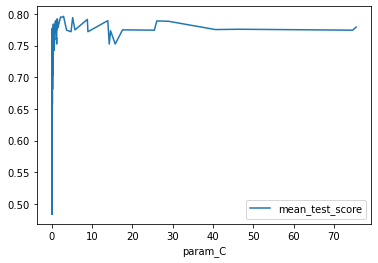

In [258]:
dftemp[['param_C','mean_test_score']].drop_duplicates().sort_values(by='param_C').plot(x='param_C',y='mean_test_score')

### SVM

SVM grid search wasn't finished due to taking too long (2+ hours without output)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# kernel= ['rbf','linear'], 
# gamma= [1e-1,1e+0,1e+1],
# C= [1e+0,1e+1,1e+2,1e+3]
# hyperparameters = dict(C=C, gamma=gamma,kernel=kernel)
# svm_gen = svm.SVC(random_state=0)
# rand_svm = GridSearchCV(svm_gen, hyperparameters, scoring='accuracy', cv=3, verbose=0, n_jobs=-1)
# svm_tuned = rand_lr.fit(X_train_tfidf.toarray(), y_train)

# print('Best Score: %s' % svm_tuned.best_score_)
# print('Best Hyperparameters: %s' % svm_tuned.best_params_)

In [ ]:
#svm_pred_tuned = svm_tuned.predict(X_test_tfidf.toarray())
#print(classification_report(y_test, svm_pred_tuned))

### Decision Tree

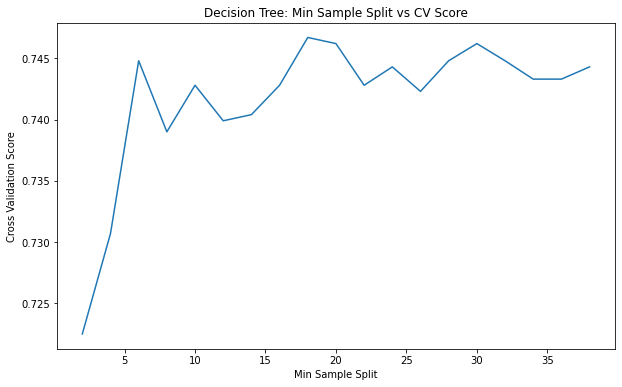

The ideal split value is: 18
Highest cross validation score we get is: 0.7467


In [52]:
#Decision Tree Cross Validation
sample_splits = []
cv_scores_dt = []

for k in range(2,40,2):
    sample_splits.append(k)
    dtc = tree.DecisionTreeClassifier(min_samples_split = k, random_state=42)
    scores = cross_val_score(dtc, X_train,y_train, cv=10, scoring = 'accuracy')
    cv_scores_dt.append(round(scores.mean(),4))

optimal_split_val = sample_splits[cv_scores_dt.index(max(cv_scores_dt))]

plt.figure(figsize = (10,6))
plt.title("Decision Tree: Min Sample Split vs CV Score")
plt.plot(sample_splits, cv_scores_dt)
plt.xlabel('Min Sample Split')
plt.ylabel('Cross Validation Score')
plt.show()

print('The ideal split value is:', optimal_split_val)
print('Highest cross validation score we get is:', max(cv_scores_dt))

### Random Forest

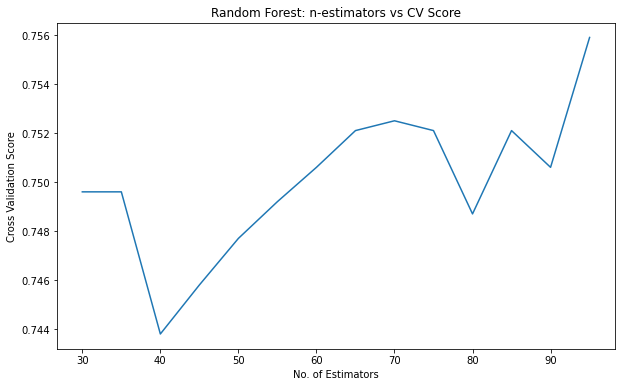

The ideal n-estimator value is: 95
Highest cross validation score we get is: 0.7559


In [53]:
#Random Forest
estimators = []
cv_scores_rf = []

#perform 10 fold cross validation
for k in range(30,100,5):
    estimators.append(k)
    dtc = RandomForestClassifier(n_estimators = k, random_state=42)
    scores = cross_val_score(dtc,X_train,y_train,cv=10, scoring = 'accuracy')
    cv_scores_rf.append(round(scores.mean(),4))

optimal_estimator = estimators[cv_scores_rf.index(max(cv_scores_rf))]

plt.figure(figsize = (10,6))
plt.title("Random Forest: n-estimators vs CV Score")
plt.plot(estimators, cv_scores_rf)
plt.xlabel('No. of Estimators')
plt.ylabel('Cross Validation Score')
plt.show()

print('The ideal n-estimator value is:', optimal_estimator)
print('Highest cross validation score we get is:', max(cv_scores_rf))

## Seems like SVM is the winner despite the hyper-param tuning on other algos with 83%

# Similar Sentence Retrieval

### Creating temporary vectorizer

In [117]:
#cosine similarity based ranking on tfidf vector

tfidf_vec = TfidfVectorizer(ngram_range=(1,3))
trsfm=tfidf_vec.fit_transform(clean_sentences)

### Using Cosine_Similarity find similar sentences

In [118]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
def get_similar(index):
    cos_arr = cosine_similarity(trsfm[index], trsfm)
    i = np.unique(cos_arr)[-2]
    return (clean_sentences[np.where(cos_arr == i)[1][0]], i)

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Validating similarity

In [119]:
index = 1000
print("Given Sentence:", color.PURPLE + color.BOLD + clean_sentences[index] + color.END)
print("Most similar sentence:", color.RED + color.BOLD + get_similar(index)[0] + color.END, 
      "\nCosine Similarity:",  color.BLUE + color.BOLD + str(round(get_similar(index)[1],3)*100), '%')

Given Sentence: wow loved place
Most similar sentence: loved place 
Cosine Similarity: 61.7 %


In [120]:
from IPython.display import *
import ipywidgets as widgets
from ipywidgets import *

options_sent = []
index=0
for i in clean_sentences:    
    options_sent.append((i,index))
    index+=1
widget1 = Dropdown(options=options_sent,
    value=10,
    description='Select Text -',)
display(widget1)

Dropdown(description='Select Text -', index=10, options=(('way plug us unless go converter', 0), ('good case e…

In [124]:
index = widget1.value
print("Given Sentence:", color.PURPLE + color.BOLD + clean_sentences[index] + color.END)
print("Most similar sentence:", color.RED + color.BOLD + get_similar(index)[0] + color.END, 
      "\nCosine Similarity:",  color.BLUE + color.BOLD + str(round(get_similar(index)[1],3)*100), '%')

Given Sentence: far good
Most similar sentence: weeks far good 
Cosine Similarity: 60.099999999999994 %


# Validation

## Validating SVM Prediction

In [155]:
txt = 'totally pleased camera camera easily kept high end cameras able shoot good video dark aquarium stitched landscape shots ocean take all sorts killer candids buying several more students use love the long battery life since July only charged about month  frequent use battery life continues'

trsfm=vectorizer.transform([txt])
trsfm = tfidf_transform.fit_transform(trsfm)

svc_classifier_tfidf.predict(trsfm.toarray())

array(['1'], dtype=object)

In [16]:
def predict(text):
    text = ' '.join(basic_clean(text))
    text = vectorizer.transform([text])
    text = tfidf_transform.fit_transform(text)
    prediction = svc_classifier_tfidf.predict(text.toarray())
    if(prediction[0]=='0'): return 'Negative'
    else: return 'Positive'

In [17]:
predict(input("Enter review here: "))

Enter review here: very unhappy with the service. i bought this camera as a christmas gift. when it was opened and tried out, it was found that the camera did not work, it had vertical lines down the pictures taken. Since I had purchased it as a chrstmas gift, it had been past 15 days since the delivery date, so I am unable to return it. i am very unhappy with this service and i will never purchase anything off amazon again.


'Negative'

In [18]:
predict(input("Enter review here: "))

Enter review here: Got this camera for the girlfriend for Christmas, and she loves it. Takes great crisp photos and is very compact. For the price it's unbeatable.


'Positive'

# Pipeline Creation

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn import svm
# define the stages of the pipeline
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(lowercase=True,
                                                      ngram_range=(1,3),
                                                      stop_words= ENGLISH_STOP_WORDS)),
                            ('model', svm.SVC(random_state=0))])

# fit the pipeline model with the training data                            
pipeline.fit(clean_sentences, y)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(1, 3),
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
          

### Validation

In [21]:
pipeline.predict(['totally camera cool kept high'])

array(['1'], dtype=object)

### Saving Model

In [22]:
# import joblib
from joblib import dump

# dump the pipeline model
dump(pipeline, filename="model.joblib")

['model.joblib']

In [25]:
# import joblib
from joblib import load

# sample tweet text
text = ['totally pleased bad bad kept high']

# load the saved pipleine model
pipeline = load("model.joblib")

# predict on the sample tweet text
pipeline.predict(text)
## >> array([0])

array(['0'], dtype=object)